<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Regression Tutorial SWDB 2021 </h1> 
<h3 align="center">Friday, August 27, 2021</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Machine learning has many canonical problem types that we will discuss in these tutorials.  These include Regression, Classification, Clustering, and Dimension Reduction.  This tutorial is focused on Regression.
</p>
<p>
    Regression is an example of a Supervised Learning problem.  In a regression problem, we are given pairs of data points $(\vec{x}_i, y_i)$ where $i \in [1,N]$.  We want to develop a function $f(\vec{x})$ such that $f(\vec{x}_i)\approx y_i$ for each pair of points in the data set.
    </p>
    <p>
    The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the analysis.  They are often called "features".  The coefficients $w_j$ are called "weights".

You may be familiar with a version of linear regression where the functions $\phi$ are chosen to be the identity and a constant.  When the input space is one dimensional this is:

$f(x) = w x + b$
</p>
<p>
    This problem is defined by an "error function", whose minimization tries to force the function $f$ to approximate the data points $y_i$ on the inputs $\vec{x}_i$.  This error function is

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $
</p>
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  http://scikit-learn.org/stable/
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We're going to provide a simple example with fake data and then use the same model to fit data from the Brain Observatory.  The model we fit will be an $n$th order polynomial of a single variable:
</p>
<p>
$f_n(x) = \sum_{i=0}^n a_i x^i$
</p>
<p>
i.e.
</p>
<p>
$f_1(x) = a_0 + a_1 x$
</p>
<p>
$f_2(x) = a_0 + a_1 x + a_2x^2$
</p>
<p>
$\dots$
</p>
<p>
First we generate some example data.  This will be the true model of the data.  (In a real problem, we won't know this function; we're trying to fit it.)
</p>
<p>
$F(x) = sin(2\pi x)$
</p>
</div>

Text(0.5, 0, 'x')

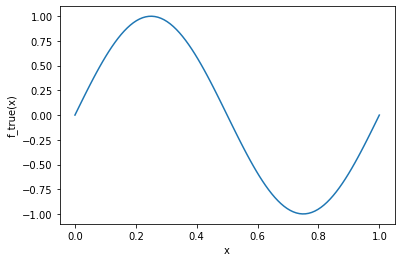

In [2]:
x0 = np.linspace(0,1.0, 100)

def f_true(xt): 
    return np.sin(2.0*np.pi*xt)

fig, ax = plt.subplots()
ax.plot(x0, f_true(x0))
ax.set_ylabel('f_true(x)')
ax.set_xlabel('x')
# ax.set_ylim(-15,30)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we generate some 'data' from this function.
    </p>
    </div>

Text(0.5, 0, 'x')

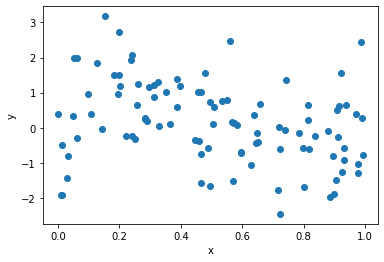

In [3]:
n = 100

x = np.sort(np.random.random(n))
y = f_true(x) + 1.0*np.random.normal(size=n)

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_ylabel('y')
ax.set_xlabel('x')
# ax.set_ylim(-40,40)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Fitting a first order polynomial.</h3>
</p>
<p>
Before we fit any models, we need to separate the data into train, validate, and test sets.  This is so that we can train the model (train), perform model comparison (validate), and test the performance of the model (test).
</p>
<p>
`scikit-learn` has a function we can use called `train_test_split`.  We use this function twice in order to generate a validation set.
</p>
</div>

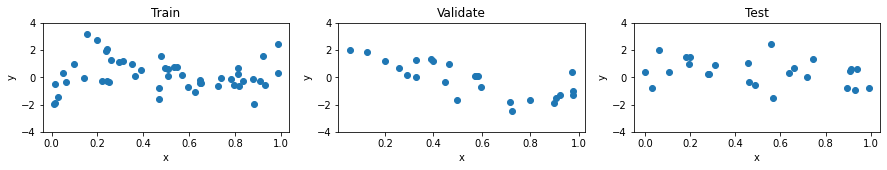

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(x, y, train_size=0.5)
x_validate, x_test, y_validate, y_test = train_test_split(x_validate, y_validate, test_size=0.5)

fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(x_train, y_train, 'o')
ax[1].plot(x_validate, y_validate, 'o')
ax[2].plot(x_test, y_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In ordert to fit the model, we need to create the object that will manage the fitting.  We are going to use the `LinearRegression` model from `sklearn.linear_model`.  Fitting works by calling the `fit` method with the data.
</p>
</div>

In [5]:
from sklearn.linear_model import LinearRegression as LR

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We reshape `x` in the `fit` method because it expects a two dimensional array of shape (samples, dimensions).
</p>
</div>

In [6]:
lr = LR()
lr.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we compare the result to the validation set.
</p>
</div>

(-4.0, 4.0)

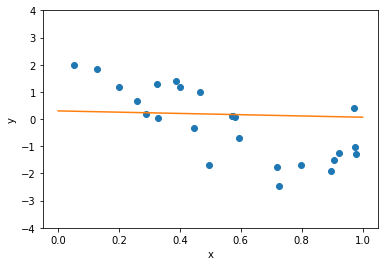

In [7]:
fig, ax = plt.subplots()
ax.plot(x_validate, y_validate, 'o')
ax.plot(x0.reshape(-1,1), lr.predict(x0.reshape(-1,1)), '-')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(-4,4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
That doesn't seem right.  Let's try multiple orders of polynomials so that we can compare them with the validation set.
</p>
<p>
     We define a function `nth_polynomial` in order to create input data whose rows are data points and whose columns are the terms in the polynomial ($x$, $x^2$, $x^3$, $\dots$)
</p>
</div>

In [8]:
def nth_polynomial(x, n):
    return np.stack([x**i for i in range(1, n+1)], axis=1)

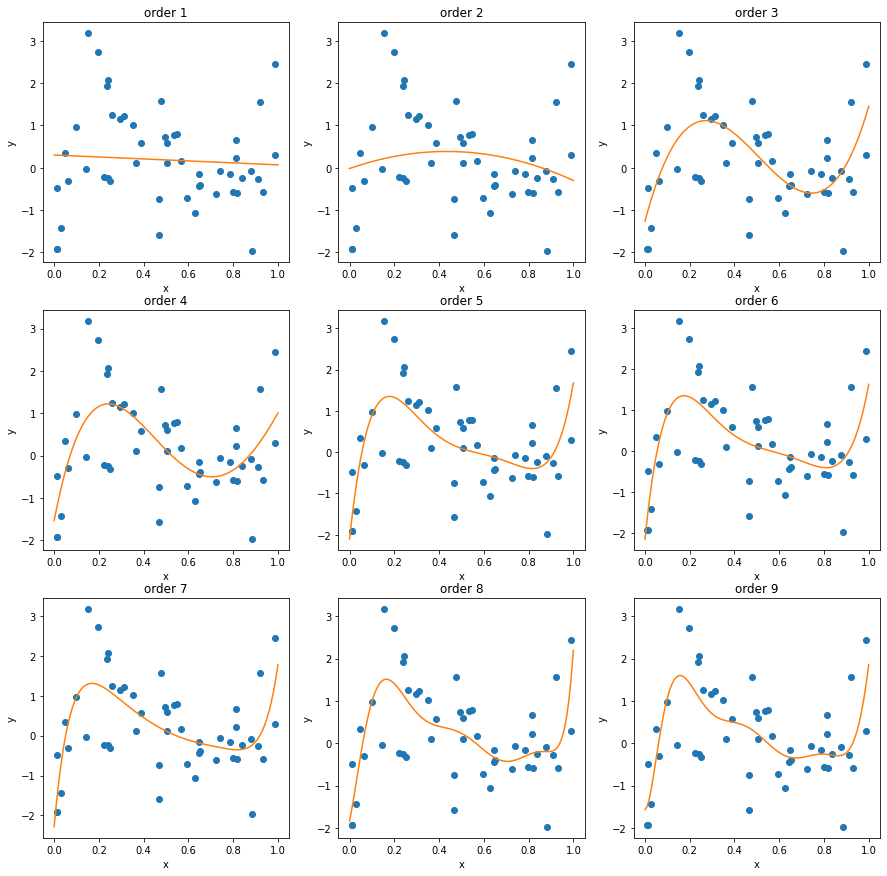

In [9]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    lr.fit(x_nth, y_train)
    
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_train, y_train, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we plot them against the validation set.
</p>
</div>

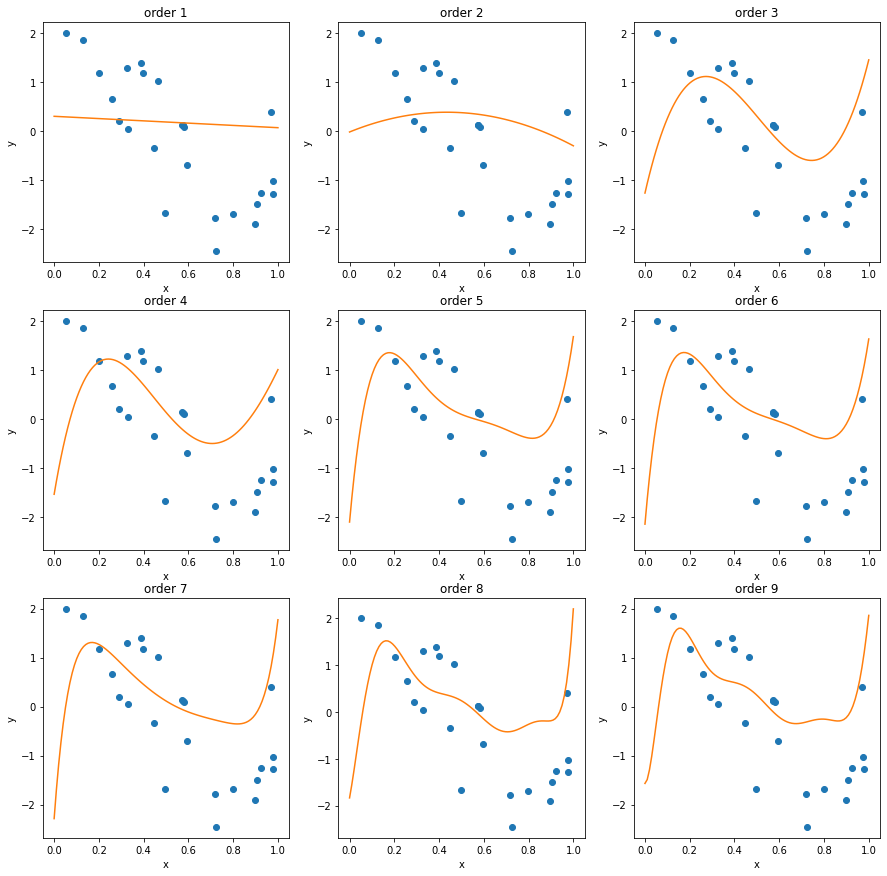

In [10]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_validate, y_validate, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
To be more precise, we compute the score, which for this model is the $R^2$ of the fit.
</p>
</div>

Best model is order:  8


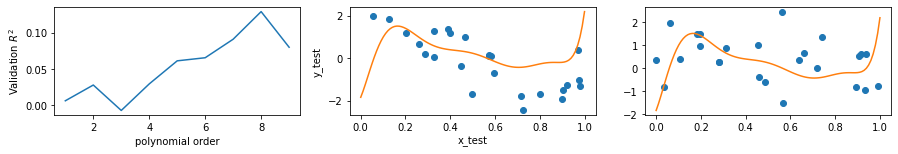

In [11]:
R2_vals = []

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_validate, i+1)
    R2 = lr.score(x_nth, y_validate)
    R2_vals.append(R2)

order = np.arange(1,max_order+1)
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(x_validate, y_validate, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax[1].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_validate')
ax[1].set_xlabel('x_validate')


ax[2].plot(x_test, y_test, 'o')
ax[2].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_test')
ax[1].set_xlabel('x_test')

print("Best model is order:  {}".format(best_model_index+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h2>Cross validation</h2>
<p>
`scikit-learn` has facilities for making cross-validation quite simple.  Here we show performing cross_validation with the functions `cross_validate` and `KFold`.  `cross_validate` performs cross validation and returns a dictionary of scores over folds.  `KFold` provides an iterator that produces indices that split the data into train and test folds.
</p>
<p>
In the following, we'll ignore the data set we labeled "validate" above.  This is just for simplicity, so I don't have extra code recreating data sets.  The data being used for validation here is part of the cross validation separation of the training set in the code below.
</p>
</div>

In [12]:
from sklearn.model_selection import cross_validate

Text(0.5, 0, 'polynomial order')

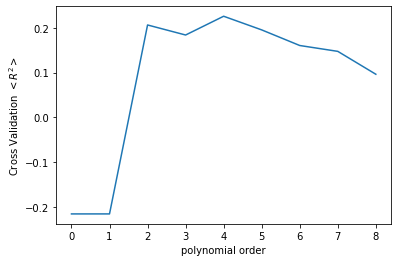

In [13]:
cv_mean_error = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    cv_dict = cross_validate(lr, x_nth, y_train, cv=4)
    cv_mean_error[i] = np.mean(cv_dict['test_score'])
    
fig, ax = plt.subplots()
ax.plot(cv_mean_error)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
#ax.set_ylim(-0.25,0.25)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We can do the same analysis with `KFold`.
</p>
</div>

In [14]:
from sklearn.model_selection import KFold

Text(0.5, 0, 'polynomial order')

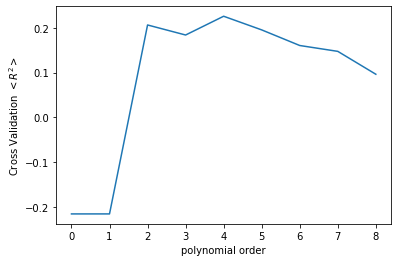

In [15]:
folds = KFold(n_splits=4)

scores = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    scores_temp = []
    for train, test in folds.split(x_train):
        x_nth = nth_polynomial(x_train[train], i+1)
        lr.fit(x_nth, y_train[train])
        x_nth = nth_polynomial(x_train[test], i+1)
        scores_temp.append(lr.score(x_nth, y_train[test]))
    scores[i] = np.mean(scores_temp)
        

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
# ax.set_ylim(-0.25, 0.25)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now that we know the best model, we can apply it to the test data.
</p>
</div>

Text(0.5, 0, 'x_test')

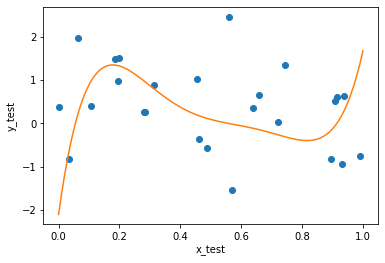

In [16]:
best_model_index = np.argmax(scores)
lr_best = lr_list[best_model_index]
x_nth = nth_polynomial(x_train, best_model_index+1)
lr_best.fit(x_nth, y_train)

fig, ax = plt.subplots()
ax.plot(x_test, y_test, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax.plot(x0, lr_best.predict(x_nth))
ax.set_ylabel('y_test')
ax.set_xlabel('x_test')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now let's try a simple example with the Allen Brain Observatory Visual Behavior Dataset.  We will try regressing the neural activity (using dF/F) against the running speed of the animal.  
</p>
</div>

In [17]:
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [18]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [19]:
import platform
platstring = platform.platform()

if ('amzn1' in platstring):
    # for AWS
    vb_cache_dir = "/data/visual-behavior-ophys-data/"
    vc_cache_dir = '/data/allen-brain-observatory/visual-coding-2p'
    
    vb_cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=vb_cache_dir, use_static_cache=True)
else:  
    # for local drive, different operating systems
    if ('Darwin' in platstring) or ('macOS' in platstring):
        # OS X 
        data_root = "/Volumes/Brain2021/"
    elif 'Windows'  in platstring:
        # Windows (replace with the drive letter of USB drive)
        data_root = "E:/"
    else:
        # your own linux platform
        # EDIT location where you mounted hard drive
        data_root = "/media/$USERNAME/Brain2021/"
        
    # visual behavior cache directory
    vb_cache_dir = os.path.join(data_root, "visual_behavior")
    vc_cache_dir = os.path.join(data_root, "visual_coding_2p")
    
    vb_cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=vb_cache_dir)

In [20]:
manifest_file = os.path.join(vc_cache_dir, 'manifest.json')
vc_cache = BrainObservatoryCache(manifest_file=manifest_file)

In [21]:
def downsample(a, bin_edges, alt_array=None):
    n = len(bin_edges)-1
    a_downsampled = np.zeros(n)
    if alt_array is not None:
        alt_downsampled_list = [np.zeros(n) for t in alt_array]
    for i in range(n):
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        bin_mask = np.logical_and(a >= lower, a < upper)
        a_masked = a[bin_mask]
        if len(a_masked)>0:
            a_downsampled[i] = np.mean(a_masked)
        else:
            a_downsampled[i] = 0
        if alt_array is not None:
            for j in range(len(alt_array)):
                vals = alt_array[j][bin_mask]
                if len(vals)>0:
                    alt_downsampled_list[j][i] = np.mean(vals)
                else:
                    alt_downsampled_list[j][i] = 0
            # alt_downsampled[i] = [np.mean(alt_array[bin_mask])
        
    if alt_array is not None:
        return a_downsampled, alt_downsampled_list
    else:
        return a_downsampled

The next two cells take the running speed and dff_trace for a neuron from one of two datasets.  Comment out, or skip, the cell that you don't want to use.

This cell below takes an experiment from the Visual Behavior Dataset

In [22]:
#Let's grab the running and dff data for a cell from an experiment

# ophys_session_id = 795953296
# cell_index = 4  # 4, 8, 12, 16

ophys_session_id = 1099240329
cell_index = 3  # 1,2,3,4

ophys = vb_cache.get_behavior_ophys_experiment(ophys_session_id)

dff_traces = ophys.dff_traces

dff_trace = np.array(dff_traces.dff.iloc[cell_index])

# why not?  let's average ALL the cells!
# dff_array = np.stack(dff_traces.dff.values, axis=0)
# dff_trace = np.mean(dff_array, axis=0)

ophys_timestamps = ophys.ophys_timestamps

running_timestamps = ophys.running_speed['timestamps'].values
running_speed = ophys.running_speed.speed.values

start = np.max([np.min(running_timestamps), np.min(ophys_timestamps)])
stop = np.min([np.max(running_timestamps), np.max(ophys_timestamps)])
start, stop

time_bins = np.linspace(start, stop, 4504)

times1, speed = downsample(running_timestamps,time_bins, alt_array=[running_speed] )
times2, dff = downsample(ophys_timestamps, time_bins, alt_array=[dff_trace])
speed = speed[0]
dff = np.array(dff)


# These variables are for compatibility with the code below
# which is from a previous version of this notebook
cell = 0
dx = speed  

This cell below takes an experiment from the Visual Coding Two-Photon Dataset

In [23]:
# exp_cont = vc_cache.get_experiment_containers(ids=[571684731])

# container_id = 564425775
# cell_id = 570927732

# # container_id = 571684731
# # cell_id = 572611384

# eid = boc.get_ophys_experiments(session_types=['three_session_A'], experiment_container_ids=[container_id])[0]['id']
# data = boc.get_ophys_experiment_data(eid)
# cell = data.get_cell_specimen_indices([cell_id])[0]

# dx, time = data.get_running_speed()
# time, dff = data.get_dff_traces()

In [24]:
L = dx.shape[0]

dx_train = dx[:L//2]
dx_validate = dx[L//2:3*L//4]
dx_test = dx[3*L//4:]

dff_train = dff[:,:L//2]
dff_validate = dff[:,L//2:3*L//4]
dff_test = dff[:,3*L//4:]

print((L, dff.shape[1]))

(4503, 4503)


Text(0.5, 0, 'acquisition frame (VC) or time (VB)')

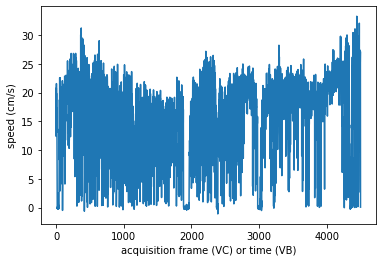

In [25]:
fig, ax = plt.subplots()
ax.plot(dx)
ax.set_ylabel('speed (cm/s)')
ax.set_xlabel('acquisition frame (VC) or time (VB)')

Text(0.5, 0, 'Running Speed (cm/s)')

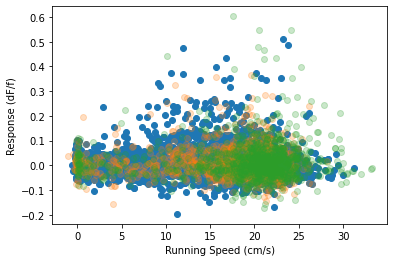

In [26]:
fig, ax = plt.subplots()
ax.plot(dx_train, dff_train[cell],'o', label='train')
ax.plot(dx_validate, dff_validate[cell],'o',alpha=0.25, label='validate')
ax.plot(dx_test, dff_test[cell],'o',alpha=0.25, label='test')
ax.set_ylabel('Response (dF/f)')
ax.set_xlabel('Running Speed (cm/s)')

Try changing the bin numbers in the cell below.

In [27]:
bin_edges = np.linspace(0,40,100) # np.linspace(0,18,100)

running_ds_train, dff_ds_train = downsample(dx_train, bin_edges, [dff_train[cell]])
running_ds_validate, dff_ds_validate = downsample(dx_validate, bin_edges, [dff_validate[cell]])
running_ds_test, dff_ds_test = downsample(dx_test, bin_edges, [dff_test[cell]])

dff_ds_train = dff_ds_train[0]
dff_ds_validate = dff_ds_validate[0]
dff_ds_test = dff_ds_test[0]

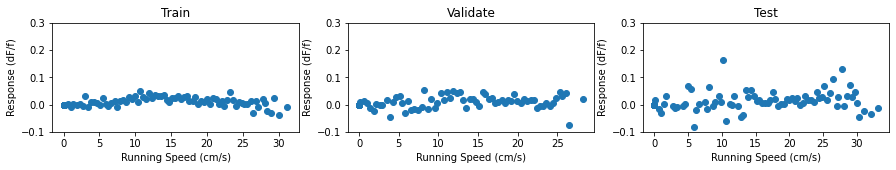

In [28]:
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(running_ds_train, dff_ds_train, 'o')
ax[1].plot(running_ds_validate, dff_ds_validate, 'o')
ax[2].plot(running_ds_test, dff_ds_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-0.1, 0.3)
    ax[i].set_xlabel('Running Speed (cm/s)')
    ax[i].set_ylabel('Response (dF/f)')

In [29]:
lr_order1 = LR()
lr_order1.fit(running_ds_train.reshape(-1,1), dff_ds_train)

LinearRegression()

In [30]:
lr_order1.intercept_, lr_order1.coef_

(0.007109688374461511, array([0.00014944]))

Text(0, 0.5, 'Response (dF/f)')

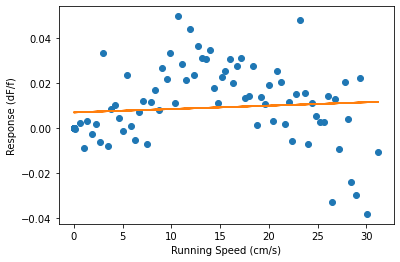

In [31]:
fig, ax = plt.subplots()
ax.plot(running_ds_train, dff_ds_train, 'o')
ax.plot(running_ds_train.reshape(-1,1), lr_order1.predict(running_ds_train.reshape(-1,1)))
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

In [32]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_ds_train, i+1)
    lr.fit(running_nth_order, dff_ds_train)

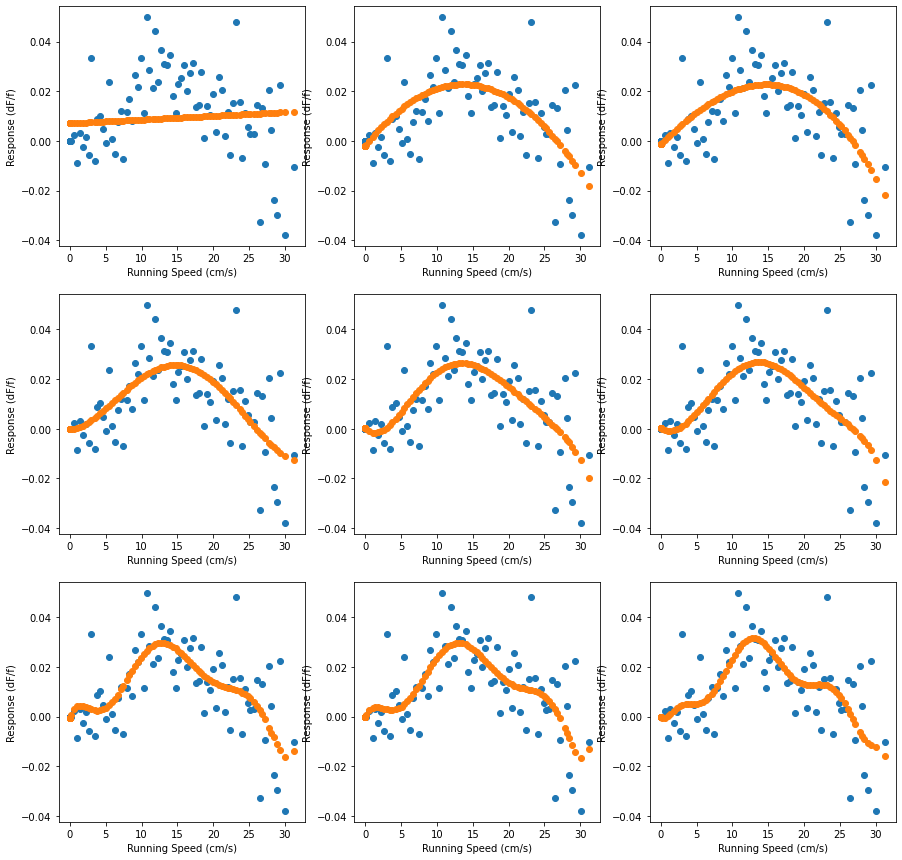

In [33]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    running_nth_order = nth_polynomial(running_ds_train, i+1)
    ax[yi, xi].plot(running_ds_train, dff_ds_train, 'o')
    ax[yi, xi].plot(running_ds_train, lr.predict(running_nth_order),'o')
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

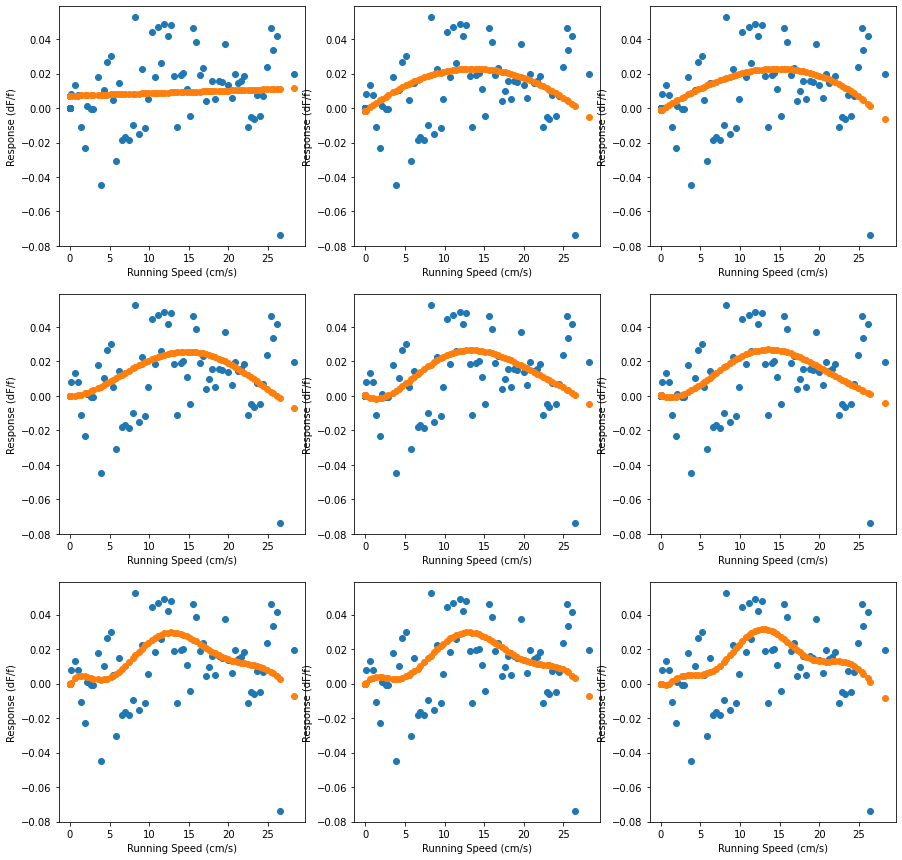

In [34]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    ax[yi, xi].plot(running_ds_validate, dff_ds_validate, 'o')
    running_nth_order = nth_polynomial(running_ds_validate, i+1)
    ax[yi, xi].plot(running_ds_validate, lr.predict(running_nth_order),'o')
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

(-0.1, 0.2)

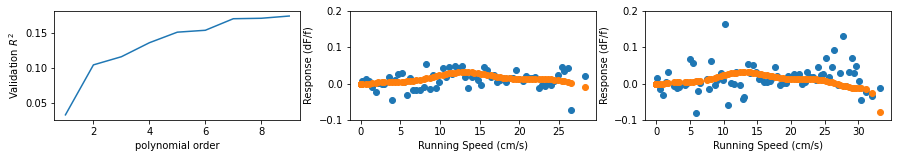

In [35]:
R2_vals = []

for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_ds_validate, i+1)
    R2 = lr.score(running_nth_order, dff_ds_validate)
    R2_vals.append(R2)
    
order = np.arange(1,len(R2_vals)+1)
    
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(running_ds_validate, dff_ds_validate, 'o')
running_nth_order = nth_polynomial(running_ds_validate, best_model_index+1)
ax[1].plot(running_ds_validate, lr_best.predict(running_nth_order),'o')
ax[1].set_xlabel('Running Speed (cm/s)')
ax[1].set_ylabel('Response (dF/f)')
ax[1].set_ylim(-0.1, 0.2)

ax[2].plot(running_ds_test, dff_ds_test, 'o')
running_nth_order = nth_polynomial(running_ds_test, best_model_index+1)
ax[2].plot(running_ds_test, lr_best.predict(running_nth_order),'o')
ax[2].set_xlabel('Running Speed (cm/s)')
ax[2].set_ylabel('Response (dF/f)')
ax[2].set_ylim(-0.1, 0.2)

In [36]:
running_nth_order = nth_polynomial(running_ds_test, best_model_index+1)
print(lr_best.score(running_nth_order, dff_ds_test))

-0.11971575329598672


Text(0, 0.5, 'Response (dF/f)')

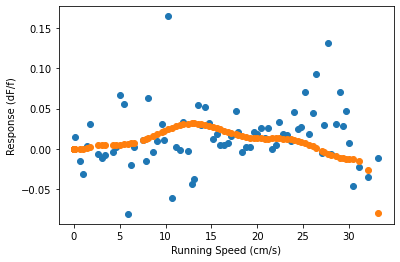

In [37]:
fig, ax = plt.subplots()

ax.plot(running_ds_test, dff_ds_test, 'o')
running_nth_order = nth_polynomial(running_ds_test, best_model_index+1)
ax.plot(running_ds_test, lr_best.predict(running_nth_order),'o')
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')